In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pd. __version__

'2.2.2'

In [3]:
!python -V
!pip install kaggle

Python 3.10.14
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 10.8 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.14-py3-none-any.whl size=105118 sha256=5f0a1adddf5f52e7170c0496a5cc53cf00631e75e3b6509faef50a3dc7d3a9eb
  Stored in directory: /home/ivanhusarov/.cache/pip/wheels/d7/54/06/8a8f40cb39536605feb9acaacd0237a95eba39e5065e6392f4
Successfully built kaggle


In [3]:
!kaggle competitions download -c ai-defence-summer-school-2024

 98%|███████████████████████████████████████▎| 133M/135M [00:06<00:00, 28.7MB/s]
100%|████████████████████████████████████████| 135M/135M [00:06<00:00, 23.0MB/s]


In [3]:
import json
import pandas as pd


# # lines = []
# # with open('/kaggle/input/ai-defence-summer-school-2024/messages/messages.jsonl') as f:
# # with open('./messages.jsonl') as f:
# #     lines = f.read().splitlines()

# # line_dicts = [json.loads(line) for line in lines]
# # df_final = pd.DataFrame(line_dicts)
# # df_final = pd.read_json('./messages.jsonl', lines=True)

# df_final = pd.read_json('messages.jsonl', lines=True, encoding_errors='ignore')
# # df_final = pd.read_csv('out.csv')
# print(df_final)
# import json

# def clean_jsonl_file(file_path):
#     cleaned_lines = []
#     with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
#         for line in file:
#             line = line.strip()
#             if line:
#                 try:
#                     json.loads(line)  # Check if the line is valid JSON
#                     cleaned_lines.append(line)
#                 except json.JSONDecodeError:
#                     print(f"Skipping invalid line: {line[:30]}...")  # Print the first 30 chars of the invalid line
#     return cleaned_lines

# cleaned_lines = clean_jsonl_file('messages.jsonl')

# cleaned_data = '\n'.join(cleaned_lines)

# Load the cleaned data into a DataFrame
# with open(file_path, 'r', encoding='utf-8') as file:
#     for line in file:
#         try:
#             data = json.loads(line.strip())
#             print(data)
#         except json.JSONDecodeError as e:
#             print(f"Error decoding JSON: {e}")

df_final = pd.read_json('../ai-defence-summer-school-2024/messages/messages.jsonl', lines=True)
# df_final = pd.read_json(cleaned, lines=True, encoding_errors='ignore')

# valid_json_objects = []

# # Read and preprocess the JSONL file
# with open('messages.jsonl', 'r', encoding='utf-8') as file:
#     for line in file:
#         try:
#             data = json.loads(line.strip())
#             valid_json_objects.append(data)
#         except json.JSONDecodeError as e:
#             print(f"Error decoding JSON: {e} in line: {line.strip()}")

# # Create a DataFrame from the list of valid JSON objects
# df = pd.DataFrame(valid_json_objects)

# # Display the DataFrame
# print(df.head())

In [5]:
df_final

,source_id,message_id,text,impressions,reactions,shares,comments,published_at,content_type
0,253122,1415474509,https://www.youtube.com/watch?v=eR9FIPXffUw&li...,945.0,21,3.0,0,2024-06-25 11:50:25,POST
1,253122,1408345528,Плохо спится в белую петербургскую ночь. Котор...,1429.0,164,3.0,1,2024-06-24 21:32:54,POST
2,253122,1394795522,"«Давайте посмотрим внимательно, какую свободу ...",1158.0,84,9.0,1,2024-06-23 11:33:04,POST
3,253122,1364623985,К добрым словам Владимира Гельмана в мой адрес...,1071.0,86,2.0,0,2024-06-20 15:19:26,POST
4,253122,1364694325,"Известный политолог, профессор университета Хе...",1087.0,118,4.0,2,2024-06-20 15:14:28,POST
...,...,...,...,...,...,...,...,...,...
373306,226841,776160744,Российские военные совместно с волонтерской ор...,512.0,0,0.0,0,2022-05-12 11:01:35,POST
373307,226841,776160747,Прибывшие после 19 февраля в Россию граждане У...,507.0,0,0.0,0,2022-05-12 07:52:56,REPOST
373308,226841,775473825,"За сутки Россия эвакуировала более 1,1 тысячи ...",484.0,0,0.0,0,2022-05-11 17:32:09,REPOST
373309,226841,775473830,Более 17 тысяч украинских беженцев пересекли р...,462.0,0,0.0,0,2022-05-11 15:39:43,REPOST


In [6]:
df_final.columns

Index(['source_id', 'message_id', 'text', 'impressions', 'reactions', 'shares',
       'comments', 'published_at', 'content_type'],
      dtype='object')

In [7]:
df_final.describe()

,source_id,message_id,impressions,reactions,shares,comments,published_at
count,3.733110e+05,3.733110e+05,3.732560e+05,373311.000000,3.701360e+05,373311.000000,373311
mean,3.929642e+07,1.240145e+09,1.208559e+04,202.624763,2.564916e+02,7.516663,2024-03-04 11:42:52.119090944
min,2.000000e+00,1.459680e+05,0.000000e+00,0.000000,0.000000e+00,0.000000,2011-10-30 16:31:54
25%,2.285540e+05,1.250243e+09,1.800000e+01,0.000000,1.000000e+00,0.000000,2024-04-24 09:26:03
50%,2.046494e+06,1.396224e+09,6.920000e+02,7.000000,4.000000e+00,0.000000,2024-06-16 07:26:46
75%,8.666135e+07,1.418283e+09,4.887000e+03,66.000000,2.100000e+01,1.000000,2024-06-24 07:33:01
max,1.450078e+08,1.434559e+09,1.236680e+07,223784.000000,3.027542e+06,52455.000000,2024-06-27 03:36:01
std,5.165697e+07,3.406261e+08,8.553164e+04,1318.612625,6.117327e+03,159.369843,NaN


In [9]:
df_final['content_type'].describe()

count     373311
unique         3
top         POST
freq      269719
Name: content_type, dtype: object

In [8]:
import re

url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

# Function to check if a string contains a URL
def replace_url(text):
    return url_pattern.sub('', text)

#     return bool(url_pattern.search(text))

# Apply the function to the column and sum the results
pd.set_option('display.max_colwidth', None)
df_final['text_no_url'] = df_final['text'].apply(replace_url)

# df_final[(df_final['text'].apply(contains_url))]['source_id'].nunique()


In [15]:
pip install wordcloud nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 41.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 775.1/775.1 kB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 13.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [43]:
# df_final['text']

In [46]:
# import re

# def clean_text(text):
#     clean_txt = text.lower()
#     # Clear characters other than numbers and letters of the alphabet only
#     clean_txt = re.sub(r'[^0-9a-zçğıiöşü\s]', '', clean_txt,
#                        flags=re.IGNORECASE)  

#     return ' '.join(sorted(clean_txt.split()))


# cleaned_texts = [clean_text(text) for text in texts]

In [13]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 108.2 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 MB 38.0 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(df_final['text'])

In [17]:
term_freq = pd.DataFrame(vectorizer.vocabulary_, index=[0])

In [53]:
# _t_term_freq.index.str.contains(r'\d')

array([False, False, False, ..., False, False, False])

In [18]:
_t_term_freq = term_freq.T

In [19]:
_t_term_freq['count'] = _t_term_freq[0]
# _t_term_freq[~_t_term_freq.index.str.contains(r'\d')]
# _t_term_freq.sort_values(by='count', ascending=False)
_t_term_freq.describe()

,0,count
count,939853.000000,939853.000000
mean,469926.000000,469926.000000
std,271312.335612,271312.335612
min,0.000000,0.000000
25%,234963.000000,234963.000000
50%,469926.000000,469926.000000
75%,704889.000000,704889.000000
max,939852.000000,939852.000000


In [20]:
counts = pd.DataFrame(tfidf_matrix.toarray(),
                      columns=vectorizer.get_feature_names())

MemoryError: Unable to allocate 2.55 TiB for an array with shape (373311, 939853) and data type float64

In [ ]:
counts.T.sort_values(by=0, ascending=False).head(10)

In [21]:
train = pd.read_csv('train.csv')
train

,source_id,source_url,source_category
0,133653,https://twitter.com/IFR2022,AGGRESSIVE_INFORMATION
1,39644,https://t.me/warfakeskrm,RESTRAINED_INFORMATION
2,245395,https://t.me/od_patrolpolice,SAFE_CONTENT
3,252210,https://t.me/trech_kich,SPAM
4,226108,https://t.me/sitreports,RESTRAINED_INFORMATION
...,...,...,...
3255,39593,https://t.me/subbotin_ru,RESTRAINED_INFORMATION
3256,238603,https://t.me/CinCAFU,SAFE_CONTENT
3257,144255926,https://twitter.com/Opoveshenie,AGGRESSIVE_INFORMATION
3258,240164,https://t.me/wyattreed13,RESTRAINED_INFORMATION


In [22]:
df_final.columns

Index(['source_id', 'message_id', 'text', 'impressions', 'reactions', 'shares',
       'comments', 'published_at', 'content_type', 'text_no_url'],
      dtype='object')

In [23]:
train.columns

Index(['source_id', 'source_url', 'source_category'], dtype='object')

In [24]:
cols = ['source_id']

df_merged = df_final.join(train.set_index(cols), on=cols)

In [25]:
# df_merged[df_merged['']]
df_merged.groupby('source_category').size()


source_category
AGGRESSIVE_INFORMATION                  120570
AGGRESSIVE_MILITARY                       8553
COORDINATION_OF_ATTACKS                   1979
CYBER_ATTACK_COORDINATION                  696
ENTITIES_PROMOTING_VIOLENCE_AND_HATE      6474
PERSONAL_INFORMATION                      1642
RESTRAINED_INFORMATION                   92545
RESTRAINED_MILITARY                       9590
SAFE_CONTENT                              8582
SPAM                                      4301
UNRECOGNIZED_REPUBLICS                    5643
VIOLENCE                                  2778
dtype: int64

In [75]:
# df_merged[df_merged['source_category'] == 'CYBER_ATTACK_COORDINATION']

In [26]:
df_merged['source_category'].unique()[1:]

array(['AGGRESSIVE_INFORMATION', 'RESTRAINED_INFORMATION', 'SPAM',
       'UNRECOGNIZED_REPUBLICS', 'VIOLENCE', 'RESTRAINED_MILITARY',
       'AGGRESSIVE_MILITARY', 'PERSONAL_INFORMATION',
       'COORDINATION_OF_ATTACKS', 'ENTITIES_PROMOTING_VIOLENCE_AND_HATE',
       'SAFE_CONTENT', 'CYBER_ATTACK_COORDINATION'], dtype=object)

In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ivanhusarov/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
from nltk.corpus import stopwords

stpwrd_en = nltk.corpus.stopwords.words('english')
stpwrd_ru = nltk.corpus.stopwords.words('russian')

In [29]:
stpwrd_ua = ['а', 'аби', 'абиде', 'абиким', 'абикого', 'абиколи', 'абикому', 'абикуди', 'абихто', 'абичий', 'абичийого', 'абичийому', 'абичим', 'абичию', 'абичия', 'абичиє', 'абичиєму', 'абичиєю', 'абичиєї', 'абичиї', 'абичиїй', 'абичиїм', 'абичиїми', 'абичиїх', 'абичого', 'абичому', 'абищо', 'абияка', 'абияке', 'абиякий', 'абияким', 'абиякими', 'абияких', 'абиякого', 'абиякому', 'абиякою', 'абиякої', 'абияку', 'абиякі', 'абиякій', 'абиякім', 'або', 'абощо', 'авжеж', 'авось', 'ага', 'ад', 'адже', 'аж', 'ажень', 'аз', 'ай', 'але', 'ало', 'амінь', 'ант', 'ану', 'ані', 'аніде', 'аніж', 'анізащо', 'аніким', 'анікого', 'анікогісінько', 'аніколи', 'анікому', 'аніскільки', 'аніхто', 'анічим', 'анічого', 'анічогісінько', 'анічому', 'аніщо', 'аніяка', 'аніяке', 'аніякий', 'аніяким', 'аніякими', 'аніяких', 'аніякого', 'аніякому', 'аніякою', 'аніякої', 'аніяку', 'аніякі', 'аніякій', 'аніякім', 'аніякісенька', 'аніякісеньке', 'аніякісенький', 'аніякісеньким', 'аніякісенькими', 'аніякісеньких', 'аніякісенького', 'аніякісенькому', 'аніякісенькою', 'аніякісенької', 'аніякісеньку', 'аніякісенькі', 'аніякісенькій', 'аніякісенькім', 'аніякісінька', 'аніякісіньке', 'аніякісінький', 'аніякісіньким', 'аніякісінькими', 'аніякісіньких', 'аніякісінького', 'аніякісінькому', 'аніякісінькою', 'аніякісінької', 'аніякісіньку', 'аніякісінькі', 'аніякісінькій', 'аніякісінькім', 'ат', 'ато', 'атож', 'ау', 'ах', 'ач', 'ачей', 'аякже', 'б', 'ба', 'багато', 'багатьма', 'багатьом', 'багатьох', 'баз', 'бай', 'бат', 'бах', 'бац', 'баш', 'бе', 'беж', 'без', 'безперервно', 'бел', 'бер', 'би', 'бир', 'бич', 'близько', 'близько від', 'бо', 'бов', 'бод', 'бодай', 'боз', 'бош', 'був', 'буває', 'буде', 'будем', 'будемо', 'будете', 'будеш', 'буду', 'будуть', 'будь', 'будь ласка', 'будьмо', 'будьте', 'була', 'були', 'було', 'бути', 'бух', 'буц', 'буцім', 'буцімто', 'бі', 'біб', 'більш', 'більше', 'біля', 'в', 'в бік', 'в залежності від', 'в міру', 'в напрямі до', 'в порівнянні з', 'в процесі', 'в результаті', 'в ролі', 'в силу', 'в сторону', 'в супроводі', 'в ході', "в ім'я", 'в інтересах', 'вад', 'важлива', 'важливе', 'важливий', 'важливі', 'вак', 'вам', 'вами', 'ван', 'вас', 'ват', 'ваш', 'ваша', 'ваше', 'вашим', 'вашими', 'ваших', 'вашого', 'вашому', 'вашою', 'вашої', 'вашу', 'ваші', 'вашій', 'вашім', 'ввесь', 'вві', 'вгору', 'вдалині', 'вед', 'верх', 'весь', 'вех', 'вже', 'вздовж', 'ви', 'виз', 'вис', 'височині', 'вище ', 'вйо', 'власне', 'властиво', 'вміти', 'внаслідок', 'вниз', 'внизу', 'во', 'вон', 'вона', 'вони', 'воно', 'восьмий', 'вперед', 'вподовж', 'впоперек', 'впритиск', 'впритул', 'впродовж', 'впрост', 'все', 'всередині', 'всею', 'вслід', 'всупереч', 'всього', 'всьому', 'всю', 'всюди', 'вся', 'всяк', 'всяка', 'всяке', 'всякий', 'всяким', 'всякими', 'всяких', 'всякого', 'всякому', 'всякою', 'всякої', 'всяку', 'всякі', 'всякій', 'всякім', 'всі', 'всій', 'всіляка', 'всіляке', 'всілякий', 'всіляким', 'всілякими', 'всіляких', 'всілякого', 'всілякому', 'всілякою', 'всілякої', 'всіляку', 'всілякі', 'всілякій', 'всілякім', 'всім', 'всіма', 'всіх', 'всією', 'всієї', 'втім', 'ві', 'віг', 'від', 'від імені', 'віддалік від', 'відколи', 'відносно', 'відповідно', 'відповідно до', 'відсотків', 'відтепер', 'відтоді', 'він', 'вісім', 'вісімнадцятий', 'вісімнадцять', 'віт', 'віф', 'віх', 'віц', 'віщо', 'віщось', 'г', 'га', 'гав', 'гаразд', 'ге', 'гез', 'гем', 'геп', 'гет', 'геть', 'гех', 'ги', 'гик', 'гир', 'гич', 'гм', 'го', 'говорив', 'гог', 'гоп', 'гоц', 'гу', 'гуп', 'д', 'да', 'давай', 'давати', 'давно', 'далеко', 'далеко від', 'далі', 'даром', 'два', 'двадцятий', 'двадцять', 'дванадцятий', 'дванадцять', 'двох', 'дві', 'де', "дев'ятий", "дев'ятнадцятий", "дев'ятнадцять", "дев'ять", 'дедалі', 'деким', 'декого', 'деколи', 'декому', 'декотра', 'декотре', 'декотрий', 'декотрим', 'декотрими', 'декотрих', 'декотрого', 'декотрому', 'декотрою', 'декотрої', 'декотру', 'декотрі', 'декотрій', 'декотрім', 'декілька', 'декільком', 'декількома', 'декількох', 'декім', 'десь', 'десятий', 'десять', 'дехто', 'дечий', 'дечийого', 'дечийому', 'дечим', 'дечию', 'дечия', 'дечиє', 'дечиєму', 'дечиєю', 'дечиєї', 'дечиї', 'дечиїй', 'дечиїм', 'дечиїми', 'дечиїх', 'дечого', 'дечому', 'дечім', 'дещо', 'деяка', 'деяке', 'деякий', 'деяким', 'деякими', 'деяких', 'деякого', 'деякому', 'деякою', 'деякої', 'деяку', 'деякі', 'деякій', 'деякім', 'деінде', 'для', 'до', 'добре', 'довго', 'довкола', 'довкіл', 'дог', 'доки', 'допоки', 'допіру', 'досить', 'досі', 'дотепер', 'доти', 'другий', 'друго', 'дуже', 'дякую', 'дійсно', 'діл', 'е', 'еге', 'еж', 'ей', 'ерг', 'ест', 'ет', 'ех', 'еч', 'ж', 'же', 'жоден', 'жодна', 'жодне', 'жодний', 'жодним', 'жодними', 'жодних', 'жодного', 'жодному', 'жодною', 'жодної', 'жодну', 'жодні', 'жодній', 'жоднім', 'жоднісінька', 'жоднісіньке', 'жоднісінький', 'жоднісіньким', 'жоднісінькими', 'жоднісіньких', 'жоднісінького', 'жоднісінькому', 'жоднісінькою', 'жоднісінької', 'жоднісіньку', 'жоднісінькі', 'жоднісінькій', 'жоднісінькім', 'жуз', 'з', 'з метою', 'з нагоди', 'з приводу', 'з розрахунку на', 'з-за', 'з-над', 'з-перед', 'з-поза', 'з-поміж', 'з-понад', 'з-поперед', 'з-посеред', 'з-проміж', 'з-під', 'з-серед', 'за', 'за винятком', 'за допомогою', 'за посередництвом', 'за рахунок', 'завгодно', 'завдяки', 'завжди', 'завше', 'задля', 'зазвичай', 'зайнята', 'зайнятий', 'зайнято', 'зайняті', 'залежно', 'залежно від', 'замість', 'занадто', 'заради', 'зараз', 'зас', 'зате', 'збоку', 'збоку від', 'зважаючи на', 'зверх ', 'зверху', 'звичайно', 'звиш', 'звідки', 'звідкилясь', 'звідкись', 'звідкіль', 'звідкіля', 'звідкілясь', 'звідси', 'звідсіль', 'звідсіля', 'звідти', 'звідтіль', 'звідтіля', 'звідусюди', 'звідусіль', 'звідціля', 'згідно з', 'здається', 'здовж', 'зем', 'зет', 'ззаду', 'зиз', 'зик', 'значить', 'знову', 'зо', 'зовсім', 'зсередини', 'зух', 'зі', 'зіс', 'и', 'ич', 'й', 'ймовірно', 'йно', 'йо', 'його', 'йой', 'йол', 'йому', 'йор', 'йот', 'йох', 'к', 'каже', 'каз', 'кар', 'каф', 'ках', 'ке', 'кед', 'кет', 'кеш', 'кив', 'кий', 'кил', 'ким', 'кимось', 'кимсь', 'ких', 'киш', 'коб', 'коби', 'кого', 'когось', 'кожен', 'кожна', 'кожне', 'кожний', 'кожним', 'кожними', 'кожних', 'кожного', 'кожному', 'кожною', 'кожної', 'кожну', 'кожні', 'кожній', 'кожнім', 'кожнісінька', 'кожнісіньке', 'кожнісінький', 'кожнісіньким', 'кожнісінькими', 'кожнісіньких', 'кожнісінького', 'кожнісінькому', 'кожнісінькою', 'кожнісінької', 'кожнісіньку', 'кожнісінькі', 'кожнісінькій', 'кожнісінькім', 'коли', 'колись', 'коло', 'кому', 'комусь', 'котра', 'котрась', 'котре', 'котресь', 'котрий', 'котрийсь', 'котрим', 'котрими', 'котримись', 'котримось', 'котримсь', 'котрих', 'котрихось', 'котрихсь', 'котрого', 'котрогось', 'котрому', 'котромусь', 'котрою', 'котроюсь', 'котрої', 'котроїсь', 'котру', 'котрусь', 'котрі', 'котрій', 'котрійсь', 'котрім', 'котрімсь', 'котрісь', 'коц', 'коч', 'коштом', 'край', 'краще', 'кру', 'круг', 'кругом', 'крю', 'кря', 'крізь', 'крім', 'куди', 'кудись', 'кудою', 'кілька', 'кільком', 'кількома', 'кількох', 'кім', 'кімось', 'кімсь', 'кінець', 'л', 'лаж', 'лап', 'лас', 'лат', 'ле', 'ледве', 'ледь', 'лет', 'лиш', 'лише', 'лишень', 'лум', 'луп', 'лут', 'льє', 'люди', 'людина', 'ля', 'лі', 'ліворуч від', 'лік', 'лім', 'м', 'мабуть', 'майже', 'мало', 'мати', 'мац', 'ме', 'меж', 'мене', 'менше', 'мені', 'мерсі', 'мет', 'мжа', 'ми', 'мимо ', 'миру', 'мит', 'мною', 'мо', 'мов', 'мовби', 'мовбито', 'могла', 'могли', 'могло', 'мого', 'могти', 'мож', 'може', 'можем', 'можемо', 'можете', 'можеш', 'можна', 'можу', 'можуть', 'можіть', 'мой', 'мол', 'мою', 'моя', 'моє', 'моєму', 'моєю', 'моєї', 'мої', 'моїй', 'моїм', 'моїми', 'моїх', 'му', 'мі', 'міг', 'між', 'мій', 'мільйонів', 'н', 'на', 'на адресу', 'на базі', 'на благо', 'на випадок', 'на відміну від', 'на засадах', 'на знак', 'на зразок', 'на користь', 'на кшталт', 'на межі', 'на основі', 'на противагу', 'на підставі', 'на честь', 'на чолі', 'на ґрунті', 'навколо', 'навкруг', 'навкруги ', 'навкіл', 'навпаки', 'навперейми', 'навпроти', 'навіть', 'навіщо', 'навіщось', 'нагорі', 'над', 'надо', 'надовкола', 'надокола', 'наді', 'назавжди', 'назад', 'назустріч', 'най', 'найбільш', 'нам', 'нами', 'наоколо ', 'наокруг ', 'наокруги ', 'наокіл', 'наперед', 'напередодні', 'напереді', 'наперекір', 'напереріз', 'наприкінці', 'напроти', 'нарешті', 'нарівні з', 'нас', 'насеред', 'насподі', 'наспід', 'настрічу', 'насупроти', 'насупротив ', 'нате', 'наче', 'начеб', 'начебто', 'наш', 'наша', 'наше', 'нашим', 'нашими', 'наших', 'нашого', 'нашому', 'нашою', 'нашої', 'нашу', 'наші', 'нашій', 'нашім', 'не', 'не до', 'не можна', 'неабичим', 'неабичого', 'неабичому', 'неабищо', 'небагато', 'небагатьма', 'небагатьом', 'небагатьох', 'небудь', 'невважаючи', 'невже', 'недалеко', 'недалеко від', 'неж', 'незалежно від', 'незважаючи', 'незважаючи на', 'ней', 'немає', 'немов', 'немовби', 'немовбито', 'неначе', 'неначебто', 'неподалеку', 'неподалеку від', 'неподалечку', 'неподалечку від', 'неподалік', 'неподалік від', 'нерідко', 'нех', 'нехай', 'нещодавно', 'нею', 'неї', 'нижче', 'низько', 'ник', 'ним', 'ними', 'них', 'нич', 'но', 'ну', 'нуг', 'нуд', 'нум', 'нумо', 'нумте', 'ньо', 'нього', 'ньому', 'ню', 'нюх', 'ня', 'няв', 'ні', 'ніби', 'ніби-то', 'нібито', 'ніде', 'ніж', 'нізащо', 'нізвідки', 'нізвідкіля', 'ній', 'ніким', 'нікого', 'нікогісінько', 'ніколи', 'нікому', 'нікотра', 'нікотре', 'нікотрий', 'нікотрим', 'нікотрими', 'нікотрих', 'нікотрого', 'нікотрому', 'нікотрою', 'нікотрої', 'нікотру', 'нікотрі', 'нікотрій', 'нікотрім', 'нікуди', 'нім', 'нінащо', 'ніскільки', 'ніт', 'ніхто', 'нічий', 'нічийна', 'нічийне', 'нічийний', 'нічийним', 'нічийними', 'нічийних', 'нічийного', 'нічийному', 'нічийною', 'нічийної', 'нічийну', 'нічийні', 'нічийній', 'нічийнім', 'нічийого', 'нічийому', 'нічим', 'нічию', 'нічия', 'нічиє', 'нічиєму', 'нічиєю', 'нічиєї', 'нічиї', 'нічиїй', 'нічиїм', 'нічиїми', 'нічиїх', 'нічого', 'нічому', 'ніщо', 'ніяк', 'ніяка', 'ніяке', 'ніякий', 'ніяким', 'ніякими', 'ніяких', 'ніякого', 'ніякому', 'ніякою', 'ніякої', 'ніяку', 'ніякі', 'ніякій', 'ніякім', 'ніякісінька', 'ніякісіньке', 'ніякісінький', 'ніякісіньким', 'ніякісінькими', 'ніякісіньких', 'ніякісінького', 'ніякісінькому', 'ніякісінькою', 'ніякісінької', 'ніякісіньку', 'ніякісінькі', 'ніякісінькій', 'ніякісінькім', 'о', 'об', 'обабіч', 'обаполи', 'обидва', 'обр', 'обік', 'обіруч', 'обіч', 'ов', 'од', 'один', 'одинадцятий', 'одинадцять', 'одна', 'однак', 'одначе', 'одне', 'одним', 'одними', 'одних', 'одно', 'одного', 'одного разу', 'одному', 'одною', 'одної', 'одну', 'одні', 'одній', 'однім', 'однією', 'однієї', 'ож', 'ой', 'окрай', 'окроме', 'округ', 'округи', 'окрім', 'окіл', 'ом', 'он', 'онде', 'онно', 'оно', 'оподаль', 'оподаль від', 'оподалік', 'оподалік від', 'опостін', 'опостінь', 'опроче', 'опріч', 'опріче', 'опісля', 'осе', 'оскільки', 'особливо', 'осторонь', 'ось', 'осісьо', 'от', 'ота', 'отак', 'отака', 'отаке', 'отакий', 'отаким', 'отакими', 'отаких', 'отакого', 'отакому', 'отакою', 'отакої', 'отаку', 'отакі', 'отакій', 'отакім', 'отакісінька', 'отакісіньке', 'отакісінький', 'отакісіньким', 'отакісінькими', 'отакісіньких', 'отакісінького', 'отакісінькому', 'отакісінькою', 'отакісінької', 'отакісіньку', 'отакісінькі', 'отакісінькій', 'отакісінькім', 'отам', 'оте', 'отже', 'отим', 'отими', 'отих', 'ото', 'отого', 'отож', 'отой', 'отому', 'отою', 'отої', 'отсе', 'оттак', 'отто', 'оту', 'отут', 'оті', 'отій', 'отім', 'отією', 'отієї', 'ох', 'оце', 'оцей', 'оцим', 'оцими', 'оцих', 'оцього', 'оцьому', 'оцю', 'оця', 'оці', 'оцій', 'оцім', 'оцією', 'оцієї', 'п', "п'я", "п'ятий", "п'ятнадцятий", "п'ятнадцять", "п'ять", 'па', 'пад', 'пак', 'пек', 'перед', 'передо', 'переді', 'перетака', 'перетаке', 'перетакий', 'перетаким', 'перетакими', 'перетаких', 'перетакого', 'перетакому', 'перетакою', 'перетакої', 'перетаку', 'перетакі', 'перетакій', 'перетакім', 'перший', 'пиж', 'плі', 'по', 'поблизу', 'побік', 'побіля', 'побіч', 'поверх', 'повз', 'повздовж', 'повинно', 'повище', 'повсюди', 'повсюдно', 'подаль від', 'подалі від', 'подекуди', 'подеяка', 'подеяке', 'подеякий', 'подеяким', 'подеякими', 'подеяких', 'подеякого', 'подеякому', 'подеякою', 'подеякої', 'подеяку', 'подеякі', 'подеякій', 'подеякім', 'подовж', 'подібно до', 'поз', 'поза', 'позад', 'позаду', 'позата', 'позате', 'позатим', 'позатими', 'позатих', 'позатого', 'позатой', 'позатому', 'позатою', 'позатої', 'позату', 'позаті', 'позатій', 'позатім', 'позатією', 'позатієї', 'позаяк', 'поздовж', 'поки', 'покрай', 'покіль', 'помежи', 'помимо', 'поміж', 'помість', 'понад', 'понадо', 'понаді', 'понижче', 'пообіч', 'поодаль від', 'поодалік від', 'поперед', 'попереду', 'поперек', 'попліч', 'попри', 'попросту', 'попід', 'пора', 'поруч', 'поряд', 'поряд з', 'порівняно з', 'посеред', 'посередині', 'потрібно', 'потім', 'поуз', 'початку', 'почерез', 'праворуч від', 'пред', 'предо', 'преді', 'прекрасно', 'прецінь', 'при', 'притому', 'причому', 'причім', 'про', 'проз', 'промеж', 'проміж', 'просто', 'проте', 'проти', 'против', 'противно', 'протягом', 'пря', 'пріч', 'пхе', 'пху', 'пі', 'пів', 'півперек', 'під', 'під знаком', 'під приводом', 'під час', 'підо', 'пізніше', 'пім', 'пір', 'після', 'р', 'ради', 'раз', 'разом з', 'разу', 'рано', 'раніш', 'раніш від', 'раніше', 'раніше від', 'раптом', 'ре', 'рет', 'риж', 'рим', 'рип', 'роб', 'року', 'років', 'рос', 'рох', 'році', 'рус', 'рух', 'руч', 'рік', 'с', 'саж', 'саз', 'сак', 'сам', 'сама', 'саме', 'сами', 'самий', 'самим', 'самими', 'самих', 'само', 'самого', 'самому', 'самою', 'самої', 'саму', 'самі', 'самій', 'самім', 'сап', 'сас', 'свого', 'свою', 'своя', 'своє', 'своєму', 'своєю', 'своєї', 'свої', 'своїй', 'своїм', 'своїми', 'своїх', 'свій', 'се', 'себе', 'себто', 'сей', 'сен', 'серед', 'середи', 'середу', 'сеч', 'си', 'сив', 'сиг', 'сиз', 'сик', 'сиріч', 'сих', 'сказав', 'сказала', 'сказати', 'скрізь', 'скільки', 'скільки-то', 'скількись', 'скільком', 'скількома', 'скількомась', 'скількомось', 'скількомсь', 'скількох', 'скількохось', 'скількохсь', 'сли', 'слідом за', 'соб', 'собою', 'собі', 'соп', 'спасибі', 'спереду', 'спочатку', 'справ', 'справді', 'став', 'стосовно', 'стільки', 'стільком', 'стількома', 'стількох', 'су', 'судячи з', 'супроти', 'супротив', 'суть', 'суч', 'суш', 'сьогодні', 'сьомий', 'сюди', 'ся', 'сяг', 'сяк', 'сяка', 'сяке', 'сякий', 'сяким', 'сякими', 'сяких', 'сякого', 'сякому', 'сякою', 'сякої', 'сяку', 'сякі', 'сякій', 'сякім', 'сям', 'сі', 'сім', 'сімнадцятий', 'сімнадцять', 'сіп', 'т', 'та', 'таж', 'так', 'така', 'таке', 'такенна', 'такенне', 'такенний', 'такенним', 'такенними', 'такенних', 'такенного', 'такенному', 'такенною', 'такенної', 'такенну', 'такенні', 'такенній', 'такеннім', 'таки', 'такий', 'таким', 'такими', 'таких', 'такого', 'також', 'такому', 'такою', 'такої', 'таку', 'такі', 'такій', 'такім', 'такісінька', 'такісіньке', 'такісінький', 'такісіньким', 'такісінькими', 'такісіньких', 'такісінького', 'такісінькому', 'такісінькою', 'такісінької', 'такісіньку', 'такісінькі', 'такісінькій', 'такісінькім', 'тал', 'там', 'тамки', 'тамта', 'тамте', 'тамтим', 'тамтими', 'тамтих', 'тамтого', 'тамтой', 'тамтому', 'тамтою', 'тамтої', 'тамту', 'тамті', 'тамтій', 'тамтім', 'тамтією', 'тамтієї', 'тар', 'тат', 'таш', 'тва', 'твого', 'твою', 'твоя', 'твоє', 'твоєму', 'твоєю', 'твоєї', 'твої', 'твоїй', 'твоїм', 'твоїми', 'твоїх', 'твій', 'те', 'тебе', 'тег', 'теж', 'тем', 'тепер', 'теперечки', 'тес', 'теф', 'теє', 'ти', 'тик', 'тил', 'тим', 'тими', 'тисяч', 'тих', 'то', 'тобою', 'тобто', 'тобі', 'того', 'тоді', 'тож', 'той', 'тол', 'тому', 'тому що', 'тот', 'тощо', 'тою', 'тої', 'тра', 'тре', 'треба', 'третій', 'три', 'тринадцятий', 'тринадцять', 'трохи', 'тс', 'тсс', 'ту', 'туди', 'тудою', 'туп', 'тут', 'тутеньки', 'тутечки', 'тутки', 'туф', 'туц', 'тю', 'тюг', 'тюп', 'тяг', 'тяж', 'тям', 'тяп', 'ті', 'тій', 'тільки', 'тім', 'тією', 'у', 'у бік', 'у вигляді', 'у випадку', 'у відповідності до', 'у відповідь на', 'у залежності від', "у зв'язку з", 'у міру', 'у напрямі до', 'у порівнянні з', 'у процесі', 'у результаті', 'у ролі', 'у силу', 'у сторону', 'у супроводі', 'у ході', 'ув', 'увесь', 'уві', 'угу', 'уже', 'узбіч', 'уздовж', 'укр', 'ум', 'унаслідок', 'униз', 'унизу', 'унт', 'уперед', 'уподовж', 'упоперек', 'упритиск до', 'упритул до', 'упродовж', 'упрост', 'ус', 'усе', 'усередині', 'услід', 'услід за', 'усупереч', 'усього', 'усьому', 'усю', 'усюди', 'уся', 'усяк', 'усяка', 'усяке', 'усякий', 'усяким', 'усякими', 'усяких', 'усякого', 'усякому', 'усякою', 'усякої', 'усяку', 'усякі', 'усякій', 'усякім', 'усі', 'усій', 'усіляка', 'усіляке', 'усілякий', 'усіляким', 'усілякими', 'усіляких', 'усілякого', 'усілякому', 'усілякою', 'усілякої', 'усіляку', 'усілякі', 'усілякій', 'усілякім', 'усім', 'усіма', 'усіх', 'усією', 'усієї', 'утім', 'ух', 'ф', "ф'ю", 'фа', 'фаг', 'фай', 'фат', 'фе', 'фед', 'фез', 'фес', 'фет', 'фзн', 'фоб', 'фот', 'фра', 'фру', 'фу', 'фук', 'фур', 'фус', 'фіш', 'х', 'ха', 'хаз', 'хай', 'хап', 'хат', 'хащ', 'хе', 'хет', 'хи', 'хиб', 'хм', 'хо', 'хов', 'хол', 'хон', 'хоп', 'хор', 'хотіти', 'хоч', 'хоча', 'хочеш', 'хро', 'хрю', 'хто', 'хтось', 'ху', 'хуз', 'хук', 'хух', 'хху', 'хіба', 'ц', 'це', 'цебто', 'цей', 'цеп', 'ци', 'цим', 'цими', 'цир', 'цих', 'цло', 'цоб', 'цок', 'цоп', 'цор', 'цс', 'цсс', 'цуг', 'цур', 'цуц', 'цього', 'цьому', 'цю', 'цюк', 'ця', 'цяв', 'цяп', 'ці', 'цід', 'цій', 'цім', 'ціною', 'цією', 'цієї', 'ч', 'чал', 'чар', 'час', 'часто', 'частіше', 'часу', 'чах', 'чей', 'чень', 'через', 'четвертий', 'чи', 'чий', 'чийого', 'чийогось', 'чийому', 'чийомусь', 'чийсь', 'чик', 'чим', 'чимось', 'чимсь', 'чир', 'численна', 'численне', 'численний', 'численним', 'численними', 'численних', 'численні', 'чию', 'чиюсь', 'чия', 'чиясь', 'чиє', 'чиєму', 'чиємусь', 'чиєсь', 'чиєю', 'чиєюсь', 'чиєї', 'чиєїсь', 'чиї', 'чиїй', 'чиїйсь', 'чиїм', 'чиїми', 'чиїмись', 'чиїмось', 'чиїмсь', 'чиїсь', 'чиїх', 'чиїхось', 'чиїхсь', 'чля', 'чого', 'чогось', 'чом', 'чому', 'чомусь', 'чон', 'чоп', 'чортзна', 'чос', 'чотири', 'чотирнадцятий', 'чотирнадцять', 'чу', 'чум', 'чур', 'чш', 'чім', 'чімось', 'чімсь', 'чіт', 'ш', 'ша', 'шаг', 'шал', 'шам', 'шво', 'шед', 'шен', 'шиз', 'шир', 'шляхом', 'шостий', 'шістнадцятий', 'шістнадцять', 'шість', 'щ', 'ще', 'щем', 'щеп', 'щип', 'щир', 'що', 'щоб', 'щоби', 'щодо', 'щойно', 'щоправда', 'щось', 'щі', 'ь', 'ю', 'юз', 'юн', 'юнь', 'юс', 'ют', 'юхт', 'я', 'яв', 'яд', 'яз', 'язь', 'як', 'яка', 'якась', 'якби', 'яке', 'якесь', 'який', 'якийсь', 'яким', 'якими', 'якимись', 'якимось', 'якимсь', 'яких', 'якихось', 'якихсь', 'якого', 'якогось', 'якому', 'якомусь', 'якось', 'якою', 'якоюсь', 'якої', 'якоїсь', 'якраз', 'яку', 'якусь', 'якщо', 'які', 'якій', 'якійсь', 'якім', 'якімсь', 'якісь', 'ял', 'ям', 'ян', 'янь', 'яо', 'яп', 'ярл', 'ясь', 'ять', 'є', 'єр', 'єси', 'і', 'ібн', 'ід', 'із', 'із-за', 'із-під', 'іззаду', 'ізм', 'ізсередини', 'ік', 'ікс', 'ікт', "ім'я", 'імовірно', 'інакша', 'інакше', 'інакший', 'інакшим', 'інакшими', 'інакших', 'інакшого', 'інакшому', 'інакшою', 'інакшої', 'інакшу', 'інакші', 'інакшій', 'інакшім', 'інколи', 'іноді', 'інша', 'інше', 'інший', 'іншим', 'іншими', 'інших', 'іншого', 'іншому', 'іншою', 'іншої', 'іншу', 'інші', 'іншій', 'іншім', 'інь', 'іч', 'іще', 'ї', 'їдь', 'їй', 'їм', 'їх', 'їхнього', 'їхньому', 'їхньою', 'їхньої', 'їхню', 'їхня', 'їхнє', 'їхні', 'їхній', 'їхнім', 'їхніми', 'їхніх', 'її', 'ґ']

In [30]:
stpwrd_result = [*stpwrd_en, *stpwrd_ru, *stpwrd_ua]
len(stpwrd_result)

2313

In [31]:
pip install git+https://github.com/Desklop/Uk_Stemmer


  Cloning https://github.com/Desklop/Uk_Stemmer to /var/tmp/pip-req-build-2u0h10es
  Running command git clone --filter=blob:none --quiet https://github.com/Desklop/Uk_Stemmer /var/tmp/pip-req-build-2u0h10es
  Resolved https://github.com/Desklop/Uk_Stemmer to commit a700ae1bd9b69ad84d311d089e8bc95ab7fab44d
  Preparing metadata (setup.py) ... done
  Created wheel for uk-stemmer: filename=uk_stemmer-1.0-py3-none-any.whl size=9496 sha256=755ee73183c81091cea4c7196730c730e946563b3939438a6ea8693732d25a1d
  Stored in directory: /var/tmp/pip-ephem-wheel-cache-ugqjbqvw/wheels/fc/ba/e4/f2601aa95c3911427cc3bc14fe639a384e1e47d5b9801d06e4
Successfully built uk-stemmer
Note: you may need to restart the kernel to use updated packages.


In [33]:
from nltk.tokenize import word_tokenize
from tqdm import tqdm
from nltk.stem.snowball import SnowballStemmer
from uk_stemmer import UkStemmer
nltk.download('punkt')

tqdm.pandas()

ukr_stemmer = UkStemmer()

eng_stemmer = SnowballStemmer("english")
rus_stemmer = SnowballStemmer("russian")

def apply_stemmers(word):

    # ukr_stemmer = SnowballStemmer("ukrainian")

    # print(eng_stemmer.stem('балтикой'))
    # print(rus_stemmer.stem('балтикой'))
    # print(ukr_stemmer.stem_word('балтикой'))
    
    return ukr_stemmer.stem_word(eng_stemmer.stem(rus_stemmer.stem(word)))

def preproc(text):
    tokenized = word_tokenize(text.lower())
    processed_ = [apply_stemmers(words) for words in tokenized if not words in stpwrd_result]
    return processed_

# df_merged['tokenized'] = 
df_merged[:5]['text'].progress_apply(lambda x: preproc(x))

[nltk_data] Downloading package punkt to
[nltk_data]     /home/ivanhusarov/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 58.56it/s]


0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       [https, :, //www.youtube.com/watch, ?, v=er9fipxffuw, &, list=pl_py0ysju3uyahjmjew7ttzicvxnoxehq, &, index=1]
1                                                            [плох, спит, бел, петербургск, ноч, ., котор, вечер, сиж, окн, смотр, открыв, дал, –, северо-запад, :, туд, ,, балтик, медлен, зреет, закат, ,, туд, ,, фон, закатн, солнц, завис, город, облак, ., проплыв, ,, имен, завис, абсолютн, безветр, последн, дне, ., ночн, светл, неб, ри

In [34]:
pip install swifter


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.6/206.6 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 38.7 MB/s eta 0:00:00:00:0100:01
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16506 sha256=867880438d56a34dfd9f0c9ba39d48d43cef0c5639bbee5869aac92f75563bc0
  Stored in directory: /home/ivanhusarov/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter
Note: you may need to restart the kernel to use updated packages.


In [75]:
pip install openai

  Using cached openai-1.35.7-py3-none-any.whl.metadata (21 kB)
Using cached openai-1.35.7-py3-none-any.whl (327 kB)
Note: you may need to restart the kernel to use updated packages.


In [76]:
pip show openai

Name: openai
Version: 1.35.7
Summary: The official Python library for the openai API
Home-page: 
Author: 
Author-email: OpenAI <support@openai.com>
License: 
Location: /opt/conda/envs/df_1/lib/python3.10/site-packages
Requires: anyio, distro, httpx, pydantic, sniffio, tqdm, typing-extensions
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [95]:
import openai
openai.api_key = ''
def get_embedding(text_to_embed):
    # Embed a line of text
    response = openai.embeddings.create(
        model= "text-embedding-3-small",
        input=[text_to_embed]
    )
    return response.data
    # Extract the AI output embedding as a list of floats
    # embedding = response["data"][0]["embedding"]
    
    # return embedding

# get_embedding('дaфываругфвы фывафы. ф ывфы в')

In [97]:
pip install fasttext-langdetect tqdm -q -U

Note: you may need to restart the kernel to use updated packages.


In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import requests
import ast
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
from tqdm.auto import tqdm
from ftlangdetect import detect
from nltk import tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [99]:
tqdm.pandas()

In [100]:
stopwords_ua_source_url = 'https://raw.githubusercontent.com/skupriienko/Ukrainian-Stopwords/master/stopwords_ua_list.txt'
stopwords_ru_source_url='https://raw.githubusercontent.com/stopwords-iso/stopwords-ru/master/stopwords-ru.txt'
results_ua = requests.get(stopwords_ua_source_url)
results_ru = requests.get(stopwords_ru_source_url)
stopwords_en = stopwords.words('english')
stopwords_ua = ast.literal_eval(results_ua.text)
stopwords_ru = results_ru.text.split('\n')
stopwords_all=stopwords_ua+stopwords_ru+stopwords_en

In [104]:
df_final.fillna(0, inplace=True)

# Remove comments
messages_df_preprocessed = df_final[
    (df_final.content_type != 'COMMENT') | (df_final.text=='')].drop_duplicates(subset=['source_id', 'text'])

# Remove only urls
url_regex=re.compile(r"http[s]*\S+$")
is_url = messages_df_preprocessed.text.progress_apply(lambda x: bool(url_regex.match(x)))
messages_df_preprocessed=messages_df_preprocessed[~is_url]

# Detect language
# messages_df_preprocessed['lang']=messages_df_preprocessed.text.progress_apply(lambda x: detect(x.replace("\n"," "))['lang'])
# top_k_lang = messages_df_preprocessed.lang.value_counts().nlargest(13).index
# messages_df_preprocessed.lang = messages_df_preprocessed.lang.progress_apply(lambda x: x if x in top_k_lang else 'other')


  0%|          | 0/365599 [00:00<?, ?it/s]

In [105]:
word_tokenizer = tokenize.RegexpTokenizer(r'\w+')

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags=re.UNICODE)

In [108]:
def collapse_dots(input):
    input = re.sub("\.+", ".", input)
    all_collapsed = False
    while not all_collapsed:
        output = re.sub(r"\.(( )*)\.", ".", input)
        all_collapsed = input == output
        input = output
    return output

def preprocess_hard(input):
    words_list = []
    for token in word_tokenizer.tokenize(input):
        if token.lower() not in stopwords_all:
            words_list.append(token)
        result_str = " ".join(words_list)
    return result_str


def process(input, light=True):
    if not isinstance(input, str):
        return input
    
    input = " ".join(tokenize.sent_tokenize(input))
    
    # Remove links
    input = re.sub(r"http[s]*\S+$", "", input)
    # Remove new line tag
    input = re.sub(r"\n+", ". ", input)
    # Remove emojis
    input = re.sub(emoji_pattern, '', input)
    # Replace telegram link with dot
    input = re.sub(r"\bt\.me/\S+", ".", input)
    # Remove sentence containing 'subscribe'
    input = re.sub(r"\bПодпишитесь на\b.*?\.", '', input)
    # Remove underscore
    input = input.replace("_", "")
    # Remove symbol followed by dot
    for symb in ["!", ",", ":", ";", "?", "_"]:
        input = re.sub(rf"\{symb}\.", symb, input)
    # Remove hashtag
    input = re.sub(r"#\S+", "", input)
    # Remove user mentioning
    input = re.sub(r"@\S+", "", input)
    # Collapse dots
    input = collapse_dots(input)
    input = input.strip()
    
    if light:
        return input
    
    return preprocess_hard(input)

In [110]:
messages_df_preprocessed['processed_text'] = messages_df_preprocessed['text'].progress_apply(process)

  0%|          | 0/359539 [00:00<?, ?it/s]

In [ ]:
import concurrent

def get_embedding(text, model="text-embedding-3-small"):
    text = text.replace("\n", " ")
    return openai.embeddings.create(input=[text], model=model).data[0].embedding

def safe_get_embedding(text):
    try:
        return get_embedding(text)
    except Exception as e:
        print(f"Error processing text: {text}\nException: {e}")
        return None

def process_row(row):
    return safe_get_embedding(row)


# messages_df_preprocessed["processed_text"]

with concurrent.futures.ThreadPoolExecutor() as executor:
    embeddings = list(tqdm(executor.map(process_row, messages_df_preprocessed["processed_text"]), total=len(messages_df_preprocessed)))

np.save('embeddings', np.asarray(embeddings, dtype="object"))
# len(embeddings)

# print(embeddings)
# print(embeddings)
# messages_df_preprocessed["embedding"] = embeddings

In [ ]:
# np.load('embeddings.npy', allow_pickle=True)

In [ ]:

import swifter

# devices.sample(frac=0.5, replace=False)
# aggr_mil_subs = df_merged[df_merged['source_category'] == 'AGGRESSIVE_MILITARY'].sample(frac=0.5, replace=False)['text_no_url'].swifter.apply(lambda x: preproc(x))
# safe_cont_subs = df_merged[df_merged['source_category'] == 'SAFE_CONTENT'].sample(frac=0.5, replace=False)['text_no_url'].swifter.apply(lambda x: preproc(x))
all_filtered = df_merged['text_no_url'].swifter.apply(preproc)

In [36]:
# np.array(aggr_mil_subs).map(lambda x: np.array(x))
aggr_mil_subs_flat = np.concatenate(np.array(aggr_mil_subs)).ravel().tolist()
safe_cont_subs_flat = np.concatenate(np.array(safe_cont_subs)).ravel().tolist()

In [37]:
tfidf = TfidfVectorizer()
tfidf.fit([*aggr_mil_subs_flat, *safe_cont_subs_flat])

TfidfVectorizer()

In [ ]:
aggr_mil_emb = tfidf.transform(aggr_mil_subs_flat).toarray()
safe_cont_emb = tfidf.transform(safe_cont_subs_flat).toarray()

In [210]:
labels__ = [0] * len(aggr_mil_subs_flat) + [1] * len(safe_cont_subs_flat)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(np.array([*aggr_mil_emb, *safe_cont_emb]))

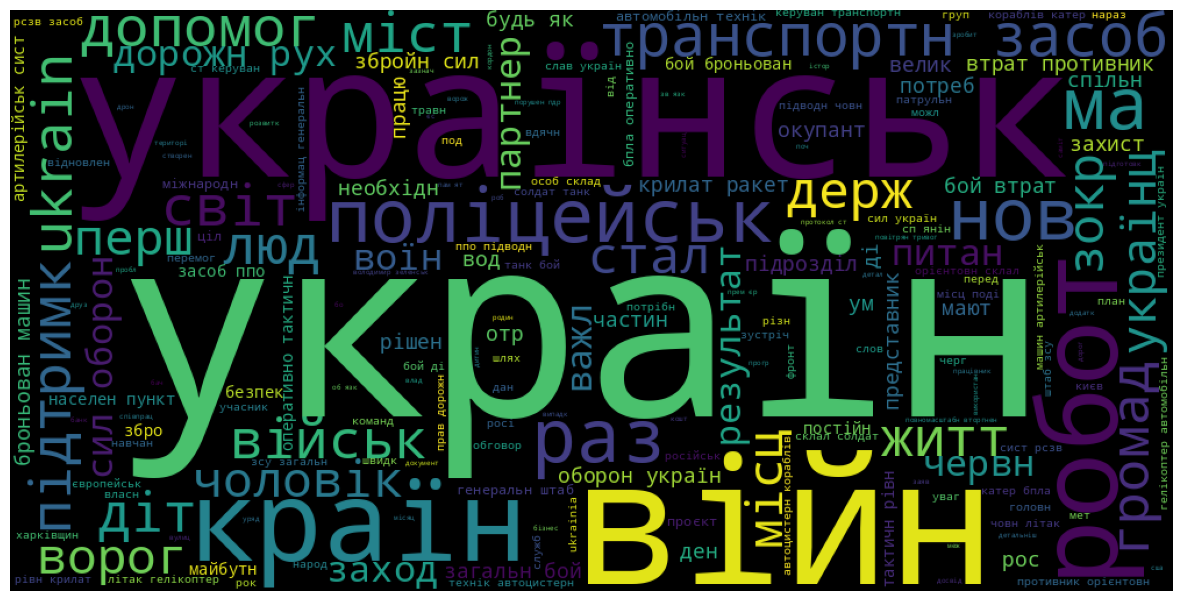

In [200]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#convert list to string and generate
unique_string=(" ").join(aggr_mil_subs_flat)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
# plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
vectorizer = TfidfVectorizer()
embeddings = vectorizer.fit_transform(texts).toarray()

In [84]:
def vectorize(subset):
#     print(subset)
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(subset['text'])
    return (vectorizer, tfidf_matrix)


vectorized_subsets = [vectorize(df_merged[df_merged['source_category'] == category]) for category in df_merged['source_category'].unique()[1:]]

In [86]:
# vectorized_subsets

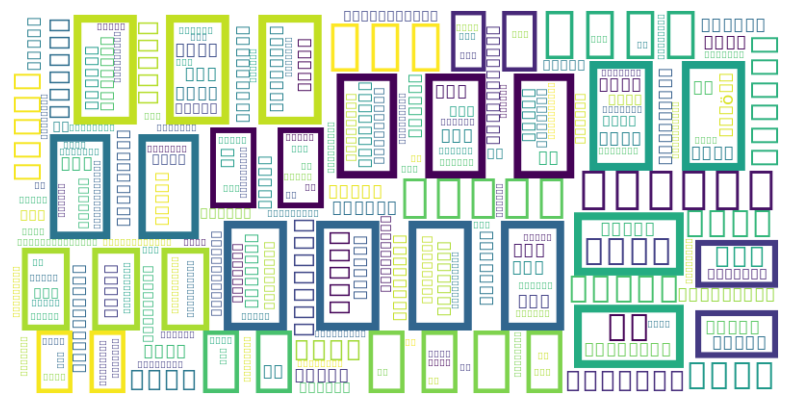

In [50]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(vectorizer.vocabulary_)

# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()